## Start by importing what is important

In [3]:
# to load in .root data in jagged arrays (using uproot3 instead of newer uproot 4)
import uproot3
# many great math functions to use on arrays
import numpy as np
# great plotting tools
import matplotlib.pyplot as plt
# useful styleistic settings for your plots, not really needed but looks nice
import mplhep as hep
plt.style.use(hep.style.CMS)

## Load in .root files using [uproot3](https://pypi.org/project/uproot3/) which converts everything to JaggedArray format
Can also use more recent [uproot 4](https://uproot.readthedocs.io/en/latest/)

In [4]:
arrays = (uproot3.open("TTbar_PU200_D49_extended.root")["L1TrackNtuple/eventTree"].arrays("*", namedecode="utf-8"))

In [5]:
# list what variables you have in the file
arrays.keys()

dict_keys(['trk_pt', 'trk_eta', 'trk_phi', 'trk_d0', 'trk_z0', 'trk_chi2', 'trk_chi2rphi', 'trk_chi2rz', 'trk_bendchi2', 'trk_nstub', 'trk_lhits', 'trk_dhits', 'trk_seed', 'trk_hitpattern', 'trk_phiSector', 'trk_genuine', 'trk_loose', 'trk_unknown', 'trk_combinatoric', 'trk_fake', 'trk_MVA1', 'trk_matchtp_pdgid', 'trk_matchtp_pt', 'trk_matchtp_eta', 'trk_matchtp_phi', 'trk_matchtp_z0', 'trk_matchtp_dxy', 'trk_matchtp_d0', 'tp_pt', 'tp_eta', 'tp_phi', 'tp_dxy', 'tp_d0', 'tp_z0', 'tp_d0_prod', 'tp_z0_prod', 'tp_pdgid', 'tp_nmatch', 'tp_nstub', 'tp_eventid', 'tp_charge', 'matchtrk_pt', 'matchtrk_eta', 'matchtrk_phi', 'matchtrk_z0', 'matchtrk_d0', 'matchtrk_chi2', 'matchtrk_chi2rphi', 'matchtrk_chi2rz', 'matchtrk_bendchi2', 'matchtrk_MVA1', 'matchtrk_nstub', 'matchtrk_lhits', 'matchtrk_dhits', 'matchtrk_seed', 'matchtrk_hitpattern'])

## A few examples of how to work with the data

In [6]:
# show the trk_pt variable organized by events
arrays['trk_pt']

<JaggedArray [[3.0139294 2.793586 18.649332 ... 3.2457705 13.491986 17.82791] [1.9581631 2.4448566 15.136438 ... 2.0070722 2.1705081 2.30754] [1.9595677 14.82837 4.4679103 ... 2.6201172 2.7978773 4.735056] ... [3.2788806 3.7828 2.0488393 ... 49.227516 8.841836 2.058875] [2.2734573 2.1817746 2.2389896 ... 1.9794437 2.3757627 7.5110025] [2.5521972 1.9532634 3.9928787 ... 2.5823507 2.639099 4.1239657]] at 0x7ff1c0674470>

In [7]:
# look at track pt within the first event
arrays['trk_pt'][0]

array([   3.0139294,    2.793586 ,   18.649332 ,    2.127825 ,
          2.0118756,    4.9517484,    1.9758649,    2.5611691,
          3.5117316,    2.7192109,    1.988086 ,    2.6531944,
          1.9595677,    2.1896431,    4.1302   , 1821.4181   ,
          2.6454875,    2.2645066,    2.2720392,    2.863865 ,
          5.5138793,    1.9515194,    2.1883278,    1.9504745,
          1.9960747,    5.2591476,    2.0678349,    9.461912 ,
          2.843744 ,    7.36919  ,    3.1421819,    2.199338 ,
          2.2248592,    2.3583317,    2.0041277,    2.543288 ,
          1.9895338,    2.1146495,    3.2769141,    2.3222501,
         14.513291 ,    1.9968042,    2.1378148,    2.191839 ,
          2.536794 ,    2.5468442,    2.5866294,    2.0733273,
          4.4551606,    2.3757627,    6.0612917,    3.8575745,
          2.1971269,    2.1619205,    4.582184 ,    2.8036194,
          2.5134566,    5.4155145,    2.4928167,    2.4002874,
          2.3997605,    2.68844  ,    2.461376 ,    4.0

In [9]:
# look at track pt in the mth event of the nth track (index starts at 0 so have to do -1)
n = 4
m = 8
arrays['trk_pt'][m-1][n-1]

1.9997271

In [10]:
# flatten the track pt jagged array so that it is no longer events based, but just an array of tracks within the full sample
arrays['trk_pt'].flatten()

array([ 3.0139294,  2.793586 , 18.649332 , ...,  2.5823507,  2.639099 ,
        4.1239657], dtype=float32)

In [12]:
# choose track pt of the ith track in the full sample
i = 10
arrays['trk_pt'].flatten()[i]

1.988086

In [13]:
# look at the log(pt) of the track pts
np.log(arrays['trk_pt'].flatten())

array([1.1032447 , 1.0273261 , 2.9258103 , ..., 0.94870013, 0.9704375 ,
       1.4168153 ], dtype=float32)

In [14]:
# only look at track eta for tracks with pt > 10 GeV
arrays['trk_eta'].flatten()[arrays['trk_pt'].flatten()>10]

array([ 9.12784100e-01,  1.16847730e+00, -8.03340137e-01,  2.24515176e+00,
        2.30088210e+00,  8.17840755e-01,  6.79025292e-01,  2.11116028e+00,
        2.11905527e+00,  1.11099437e-01,  2.13224381e-01,  2.13224351e-01,
        1.58988166e+00,  1.94091603e-01, -1.34892213e+00, -1.30536675e+00,
        3.83135527e-01,  1.26420474e+00, -1.51796031e+00, -1.21730125e+00,
       -1.35271490e+00, -1.35366118e+00, -1.35932219e+00, -1.35082006e+00,
        1.26113522e+00,  6.52026415e-01,  6.91583991e-01, -1.12909532e+00,
       -1.05610549e+00,  9.20862794e-01,  6.74291611e-01,  1.49817932e+00,
       -6.04990959e-01, -5.31290889e-01, -6.53626323e-01, -8.03340197e-01,
        2.37735748e+00,  6.48822188e-01,  2.12643099e+00,  9.51397538e-01,
        9.28894520e-01,  9.70946729e-01,  9.57945704e-01, -2.03667164e-01,
       -7.96036839e-01,  1.72149098e+00,  2.14827228e-02, -6.56821787e-01,
       -5.75178683e-01, -9.57945704e-01,  6.75870955e-01,  6.48822188e-01,
        6.48822188e-01,  

## Now let's look at some example [hists](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) using the [matplotlib](https://matplotlib.org/) toolset

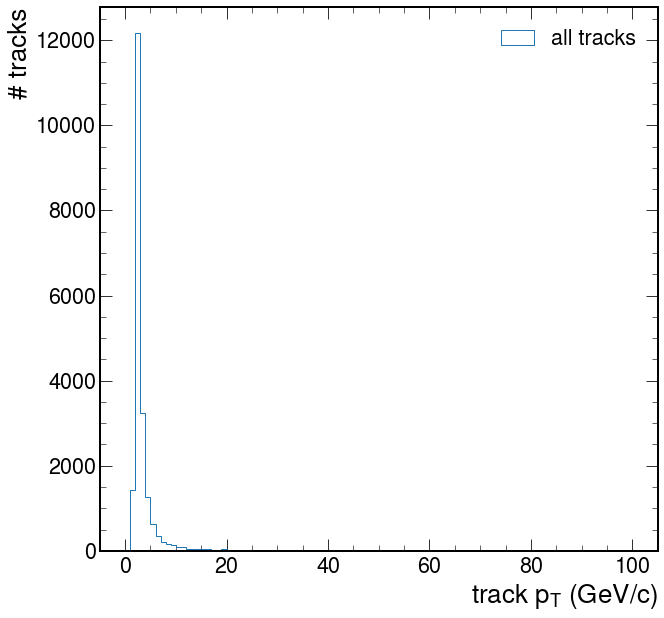

In [19]:
# a histogram of track pt
trk_pt = arrays['trk_pt'].flatten()
plt.hist(trk_pt,bins=100,range=(0,100),histtype='step',label='all tracks')
plt.xlabel('track $p_T$ (GeV/c)')
plt.ylabel('# tracks')
plt.legend(loc='best')
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

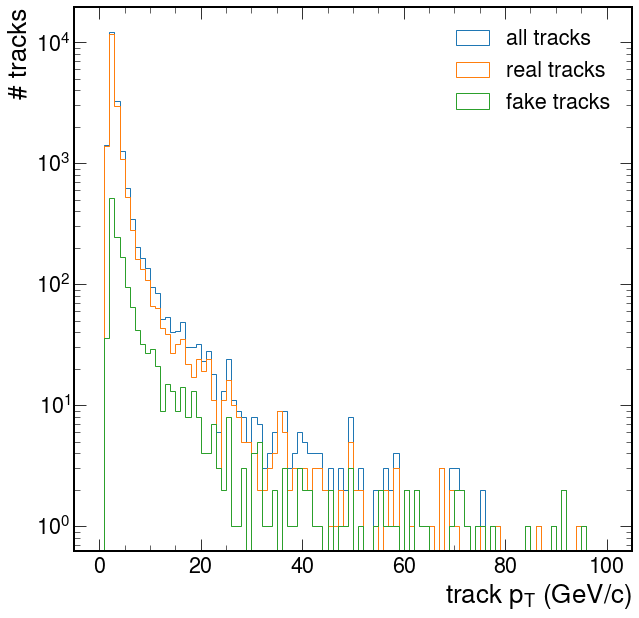

In [22]:
# a histogram of track pt overlayed with another histogram with a cut on fake tracks (trk_fake==0)
trk_pt = arrays['trk_pt'].flatten()
trk_fake = arrays['trk_fake'].flatten()
plt.hist(trk_pt,bins=100,range=(0,100),histtype='step',label='all tracks')
plt.hist(trk_pt[trk_fake>0],bins=100,range=(0,100),histtype='step',label='real tracks')
plt.hist(trk_pt[trk_fake==0],bins=100,range=(0,100),histtype='step',label='fake tracks')
plt.xlabel('track $p_T$ (GeV/c)')
plt.ylabel('# tracks')
plt.legend(loc='best')
plt.yscale('log') #if you want the y axis on log scale
plt.show()